In [5]:
import os
import glob
import matplotlib.pyplot as plt
import zipfile

In [12]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, Sequential

import cv2

In [13]:
with zipfile.ZipFile('/content/my_test_image.zip', 'r') as  target_file:
  
  target_file.extractall('my_test_image')

In [21]:
test_image_data_list = glob.glob('/content/my_test_image/*/*')

print(test_image_data_list)

['/content/my_test_image/deer/deer.1.jpg', '/content/my_test_image/cat/cat.1.jpg', '/content/my_test_image/truck/truck.1.jpg']


In [24]:
label_list = []
for index in range(len(test_image_data_list)):
  label_list.append(test_image_data_list[index].split('/')[3].strip())

In [23]:
print(label_list)

['deer', 'cat', 'truck']


In [25]:
src_img_list = []
dst_img_list = []

for index in range(len(test_image_data_list)):

  src_img = cv2.imread(test_image_data_list[index], cv2.IMREAD_COLOR)
  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  dst_img = cv2.resize(dst_img, dsize = (32, 32))
  dst_img = dst_img / 255.0

  print(src_img.shape, dst_img.shape)

  src_img_list.append(src_img)
  dst_img_list.append(dst_img)

(196, 258, 3) (32, 32, 3)
(640, 960, 3) (32, 32, 3)
(900, 1200, 3) (32, 32, 3)


In [26]:
try : 
  cnn = load_model('/content/cifar10_accuracy_82v1.h5')
  cnn.summary()

except Exception as err:
  print(str(err))

No file or directory found at /content/cifar10_accuracy_82v1.h5


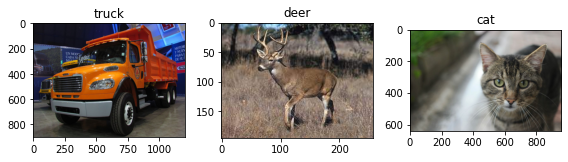

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(len(label_list)):
  
  plt.subplot(1, 3, i+1)
  plt.title(label_list[i])
  temp = cv2.cvtColor(src_img_list[i], cv2.COLOR_BGR2RGB)
  plt.imshow(temp)

plt.tight_layout()
plt.show()

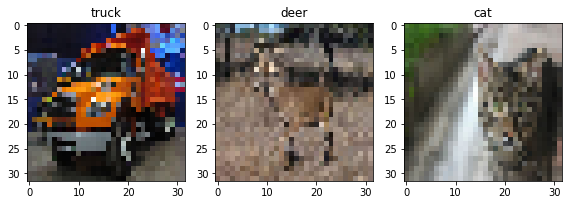

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(len(label_list)):

  plt.subplot(1, 3, i+1)
  plt.title(label_list[i])
  plt.imshow(dst_img_list[i])

plt.tight_layout()
plt.show()

In [ ]:
dst_img_array = np.array(dst_img_list)

dst_img_array.shape

(3, 32, 32, 3)

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(len(class_name))

10


In [ ]:
pred = cnn.predict(dst_img_array)

print(pred.shape)

(3, 10)


In [ ]:
for index in range(len(pred)):

  class_index = np.argmax(pred[index])
  print('prediction => ', class_name[class_index], pred[index].max(), ', label = ', label_list[index])

prediction =>  truck 0.5589308 , label =  truck
prediction =>  frog 0.85905445 , label =  deer
prediction =>  cat 0.89465404 , label =  cat


In [ ]:
top3 = 3

for index in range(len(pred)):

  sorted_index = pred[index].argsort()
  sorted_index = sorted_index[::-1]

  print('='*30)
  print(sorted_index, ',label =', label_list[index])

  for j in range(top3):
    pred_val = pred[index, sorted_index[j]]
    class_index = sorted_index[j]
    print('prediction => ', class_name[class_index], pred_val)

[9 1 0 8 6 3 2 7 5 4] ,label = truck
prediction =>  truck 0.5589308
prediction =>  automobile 0.44106916
prediction =>  airplane 3.0650675e-08
[6 4 3 2 5 7 9 0 1 8] ,label = deer
prediction =>  frog 0.85905445
prediction =>  deer 0.11379477
prediction =>  cat 0.020658273
[3 2 6 5 4 7 0 8 9 1] ,label = cat
prediction =>  cat 0.89465404
prediction =>  bird 0.053712882
prediction =>  frog 0.027285874
